In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [53]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [55]:
train_images = train_images / 255.0
test_images = test_images / 255.0

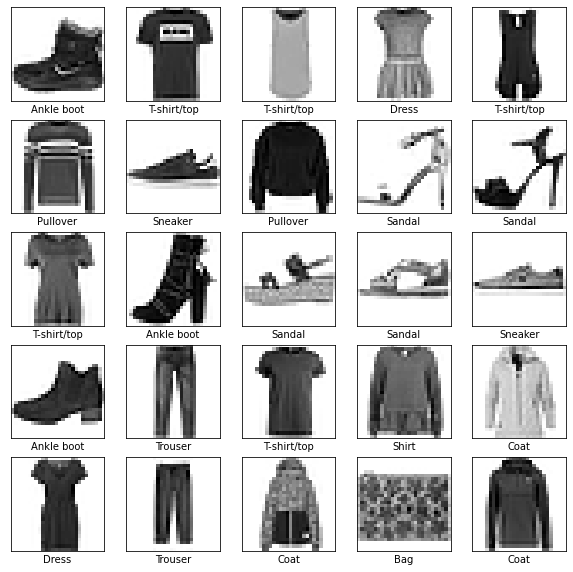

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [58]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
train = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4984 - accuracy: 0.8232
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8639
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3403 - accuracy: 0.8758
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8858
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8918
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8968
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9000
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9044
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9091
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [60]:
predictions = model.predict(test_images)

In [61]:
predictions[0]

array([3.9137848e-07, 3.6532218e-11, 7.0008700e-11, 1.3367842e-11,
       1.2338074e-11, 2.2009206e-05, 1.7078675e-06, 1.1608556e-02,
       4.4677371e-08, 9.8836738e-01], dtype=float32)

In [62]:
np.argmax(predictions[0])

9

In [64]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [65]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

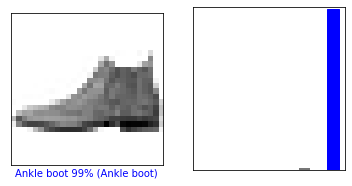

In [66]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

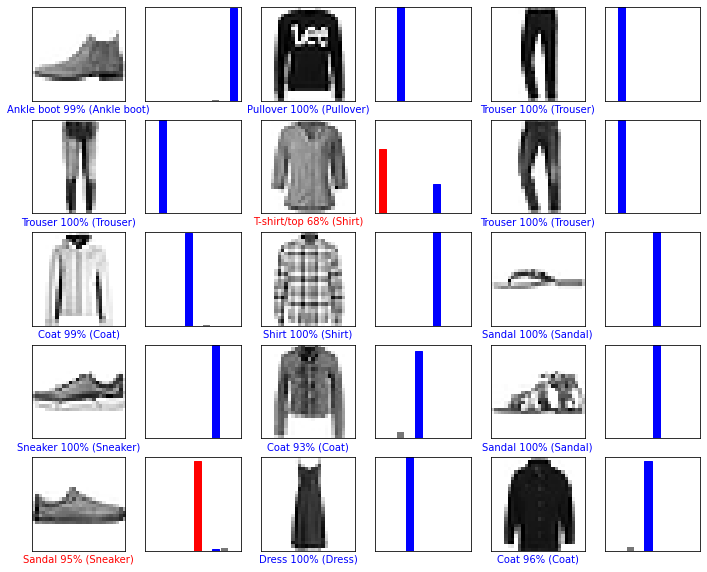

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [68]:
img = test_images[0]

In [69]:
img = (np.expand_dims (img, 0))

In [70]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.9137697e-07 3.6532149e-11 7.0008437e-11 1.3367842e-11 1.2338052e-11
  2.2009122e-05 1.7078643e-06 1.1608528e-02 4.4677197e-08 9.8836738e-01]]


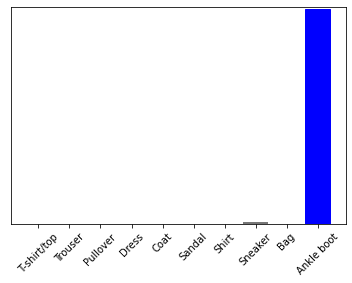

In [71]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [72]:
np.argmax(predictions_single[0])

9

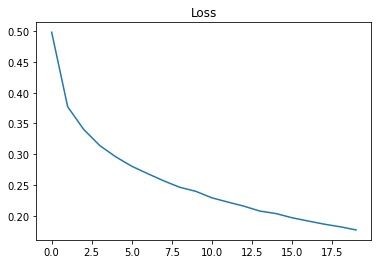

In [73]:
plt.plot(train.history['loss'])
plt.title('Loss')
plt.show()